# Drift Example

Simple 1 m drift based on the benchmark in:

3D Space Charge in Bmad
C. E. Mayes, R. D. Ryne,  D. C. Sagan,

https://accelconf.web.cern.ch/ipac2018/papers/thpak085.pdf


In [1]:
from impact import Impact

In [2]:
from pmd_beamphysics.units import mec2

import numpy as np
import os


import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [3]:
# locate the drift template
ifile = '../templates/drift/ImpactT.in'
os.path.exists(ifile)

True

In [4]:
# calculate gamma*beta
Etot = 10e6 #eV
gamma = Etot/mec2
GB = np.sqrt(gamma**2 -1)
GB

np.float64(19.543945187279075)

# Use Impact's built-in Gaussian particle generator

In [5]:
I = Impact(ifile)
I.header['Np'] = 100000
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 10e-12

In [6]:
I.lattice

[{'description': 'name:2d_to_3d_spacecharge',
  'original': '0 0 0 -5 0 0 -1000.0 /!name:2d_to_3d_spacecharge',
  'type': 'rotationally_symmetric_to_3d',
  's': -1000.0,
  'name': '2d_to_3d_spacecharge'},
 {'description': 'name:drift_1',
  'original': '1.0 0 0 0 1.0 0.15 /!name:drift_1',
  'L': 1.0,
  'type': 'drift',
  'zedge': 1.0,
  'radius': 0.15,
  's': 2.0,
  'name': 'drift_1'},
 {'description': 'name:stop_1',
  'original': '0 0 0 -99 0 0.0 1 /!name:stop_1',
  'type': 'stop',
  's': 1.0,
  'name': 'stop_1'}]

In [7]:
I.run()

In [8]:
I.output['stats'].keys()

dict_keys(['t', 'mean_z', 'mean_gamma', 'mean_beta', 'max_r', 'sigma_gamma', 'mean_x', 'sigma_x', 'norm_emit_x', 'mean_y', 'sigma_y', 'norm_emit_y', 'sigma_z', 'norm_emit_z', 'max_amplitude_x', 'max_amplitude_y', 'max_amplitude_z', 'loadbalance_min_n_particle', 'loadbalance_max_n_particle', 'n_particle', 'moment3_x', 'moment3_y', 'moment3_z', 'moment4_x', 'moment4_y', 'moment4_z', 'cov_x__x', 'cov_x__y', 'cov_x__z', 'cov_y__y', 'cov_y__z', 'cov_z__z', 'mean_kinetic_energy', 'cov_x__px', 'cov_y__py', 'cov_z__pz', 'cov_x__py', 'cov_x__pz', 'cov_px__px', 'cov_y__px', 'cov_px__py', 'cov_z__px', 'cov_px__pz', 'cov_y__pz', 'cov_py__py', 'cov_z__py', 'cov_py__pz', 'cov_pz__pz'])

In [9]:
PI = I.particles['initial_particles']
PF = I.particles['final_particles']

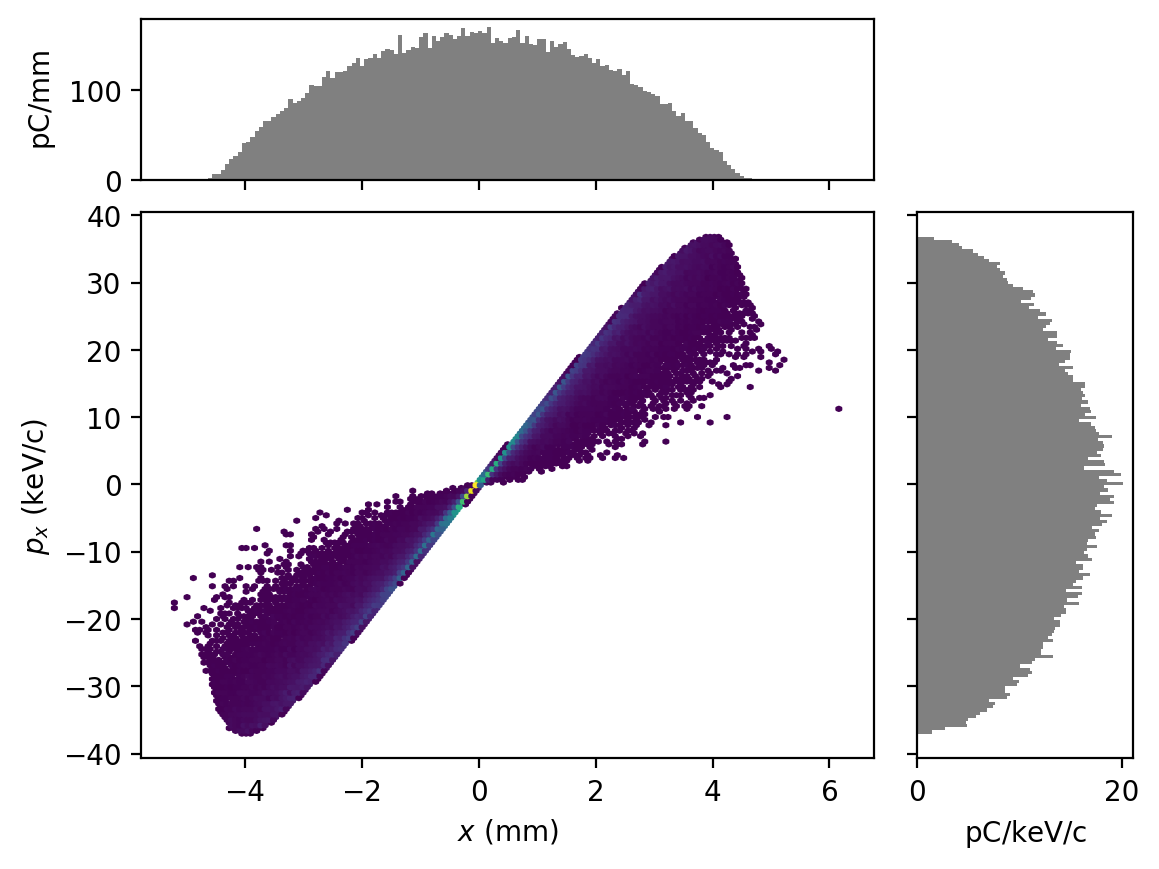

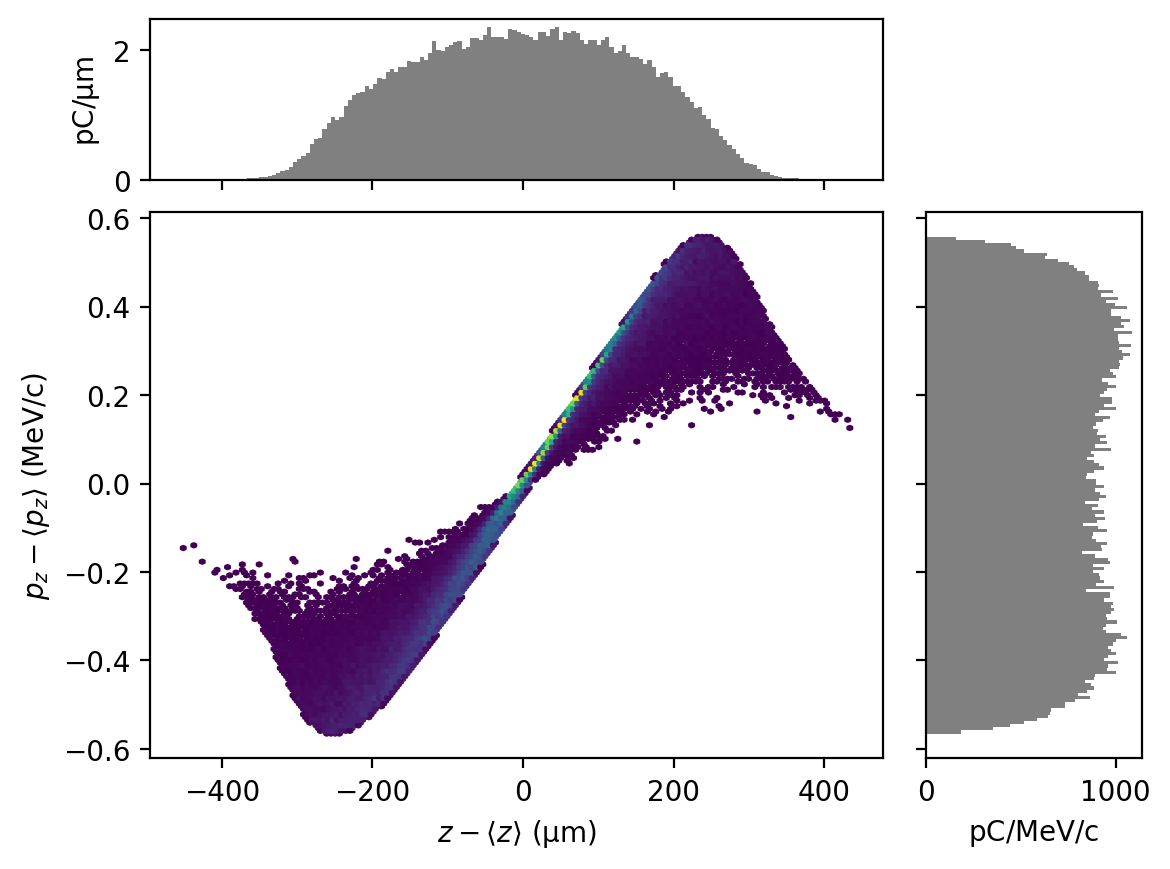

In [10]:
PF.plot('x', 'px')
PF.plot('delta_z', 'delta_pz')

# Make particles in distgen

In [11]:
from distgen import Generator

YAML="""
n_particle: 20000
random_type: hammersley
species: electron
start:
  tstart:
    units: sec
    value: 0
  type: time
total_charge:
  units: nC
  value: 1
r_dist:
  sigma_xy:
    units: mm
    value: 1.0
  type: radial_gaussian
z_dist:
  avg_z:
    units: mm
    value: 0
  sigma_z:
    units: mm
    value: 0.1
  type: gaussian
  

transforms:
  setPz:
    type: set_avg pz
    avg_pz: 
      value: 10
      units: MeV/c
  
"""
G = Generator(YAML)
G.run()
P = G.particles


In [12]:
I = Impact(ifile, initial_particles=P, verbose=False)
print(I)

================ Impact-T Summary ================    
10000 particles
1 bunch of electrons
total charge: 1000.0000000000001 pC
Distribution type: gauss3
Free space start
Processor domain: 1 x 1 = 1 CPUs
Space charge grid: 32 x 32 x 32
Maximum time steps: 1000000
Reference Frequency: 1000000000.0 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning
Impact-T configured in /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpvoqg429s


In [13]:
I.header['Nemission']

0

In [14]:
I = Impact(ifile, initial_particles=P)
I.run()
PF2 = I.particles['final_particles']

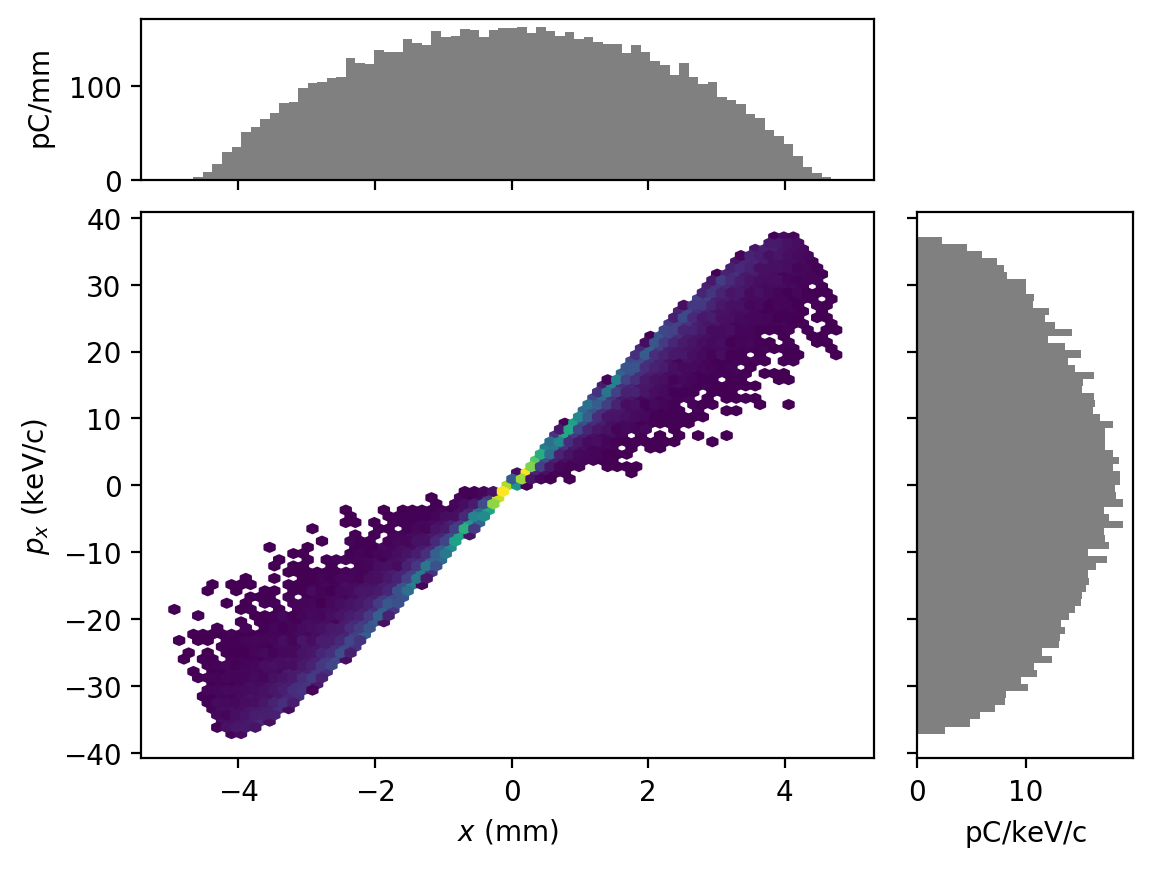

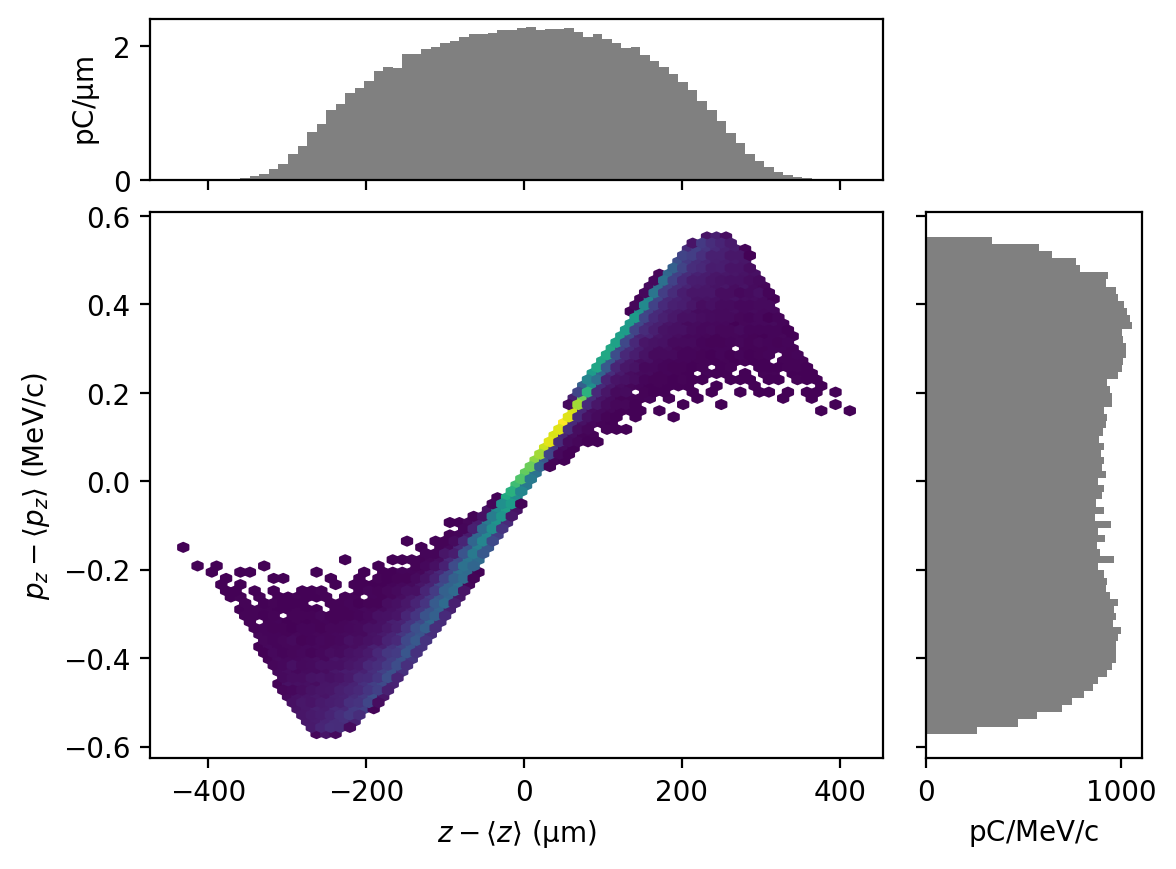

In [15]:
PF2.plot('x', 'px')
PF2.plot('delta_z', 'delta_pz')

# Compare

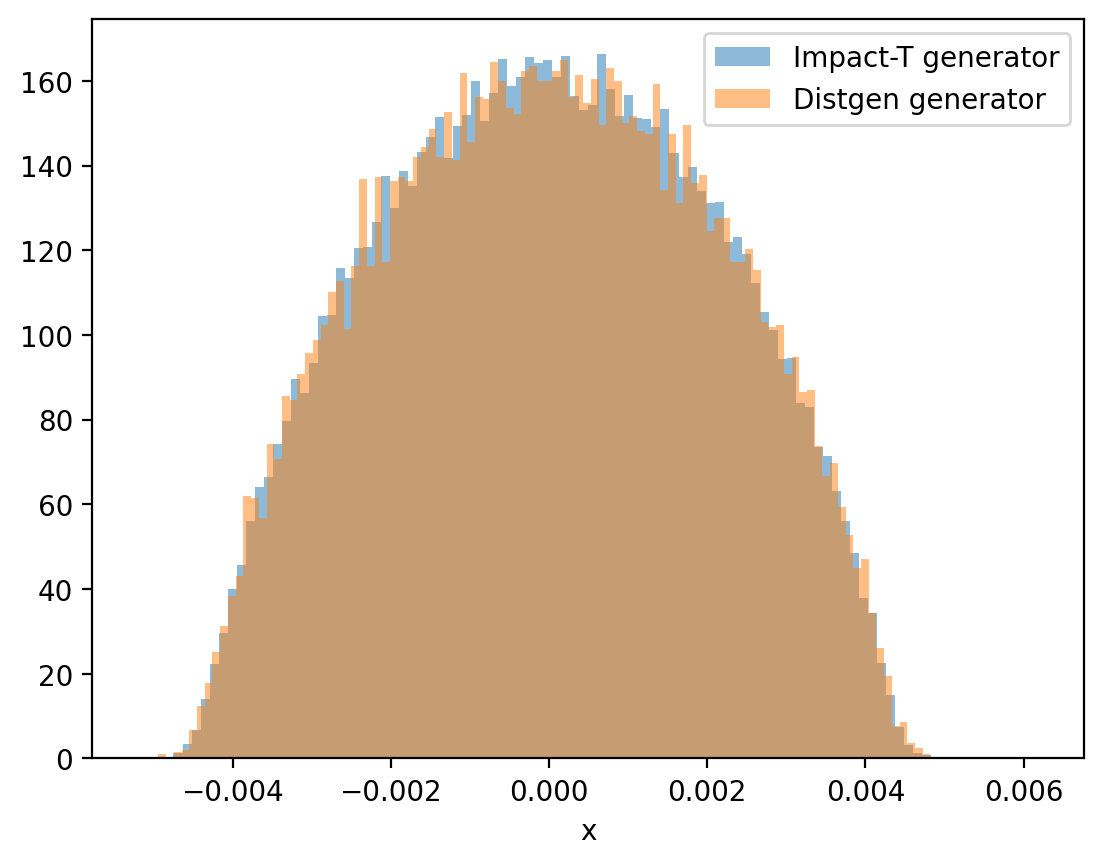

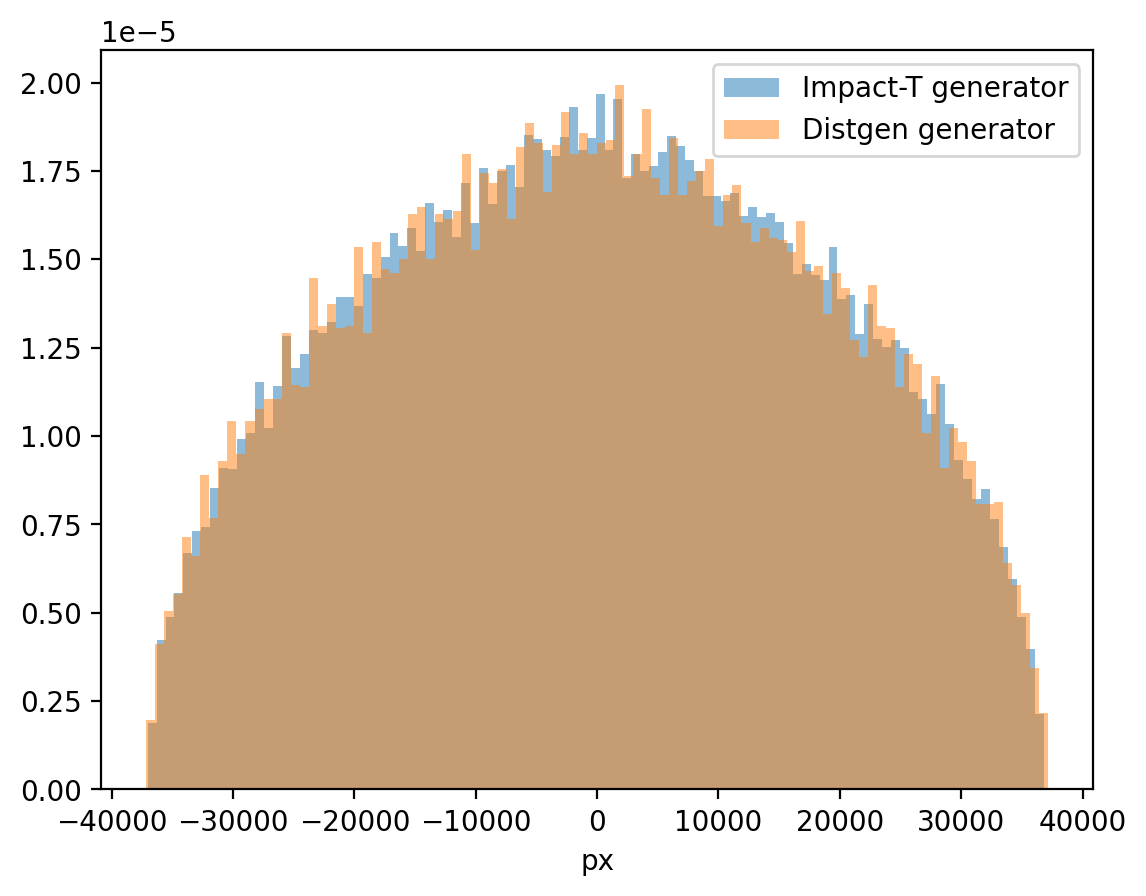

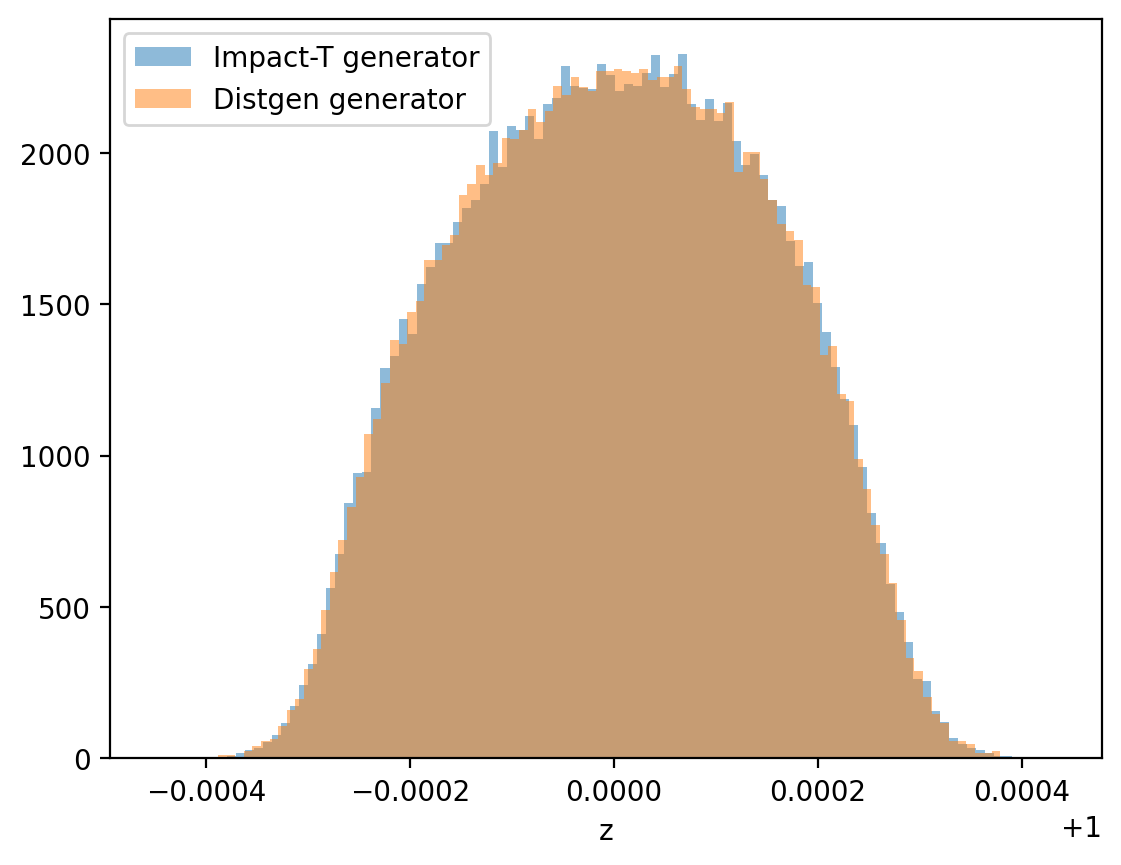

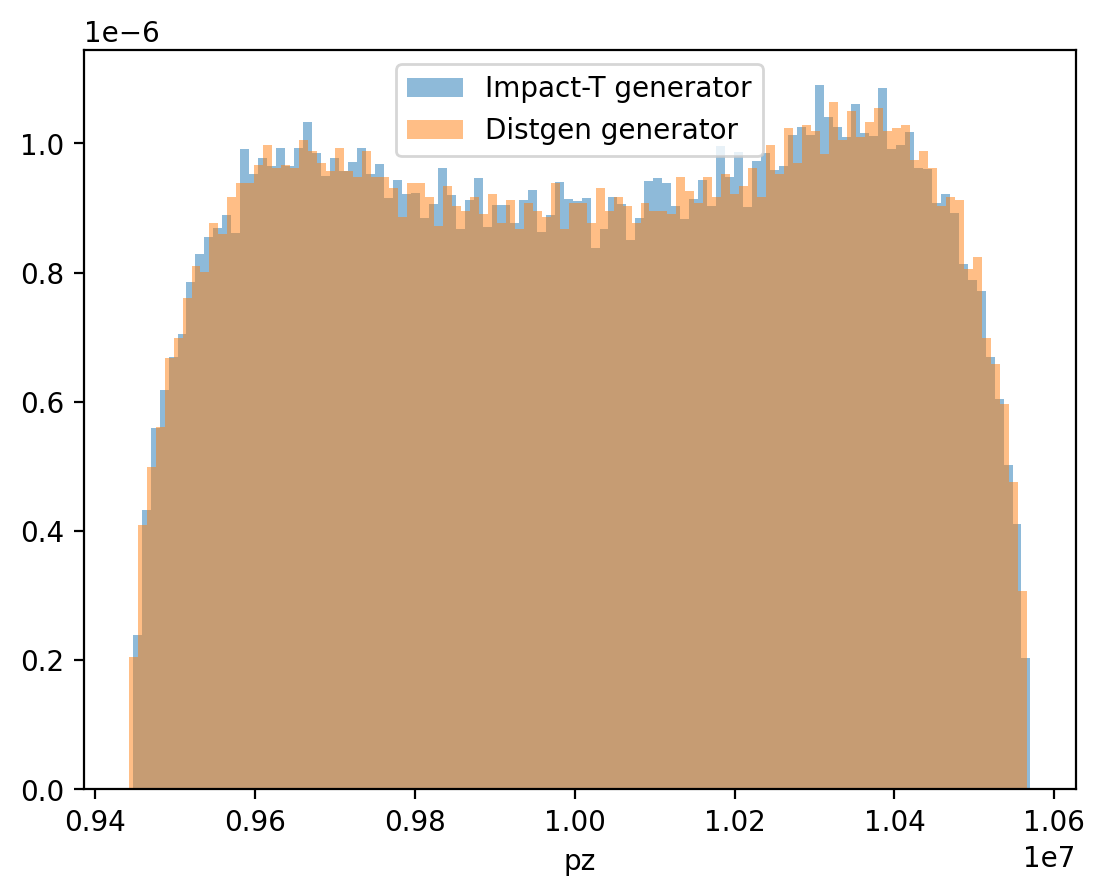

In [16]:
for k in ['x', 'px', 'z', 'pz']:
    plt.hist(PF[k], density=True, bins=100, label='Impact-T generator', alpha=0.5)
    plt.hist(PF2[k], density=True, bins=100, label='Distgen generator', alpha=0.5)
    plt.xlabel(k)
    plt.legend()
    plt.show()